<a href="https://colab.research.google.com/github/marcosdiezw/Adaptative_learning_challenge/blob/main/QConcursos_answer_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
**<center> <font color=darkblue size=12> Desafio Sigma Geek & QConcursos </font> </center>**
***

<center>
<img src='https://www.estudaqui.com/wp-content/uploads/2021/10/Logo-Estudaqui-normal.png.webp' align="middle" width= "500">
</center>


# **1) Introdução e enunciado**

**DataSet**

Para esse desafio disponibilizamos dois conjuntos de dados que, reunidos, concentram informações qualitativas dos usuários, informações sobre as questões e sobre o desempenho em cada resolução. Destaca-se ainda que os dados foram anonimizados de modo que é impossível identificar o indivíduo contido no exemplo.

**O Desafio**


* Os participantes deverão criar um modelo para classificar a resposta à 101ª questão, dado um conjunto de 100 respostas a questões feitas na sequência por 20.000 usuários.

* O banco de dados ***Dataset_Model*** contém as respostas de 100 questões respondidas sequencialmente por  20.000 usuários e deverá ser usado para treinar o modelo.

* O arquivo ***subjects_question***  contém informações adicionais sobre as perguntas, mapeando as perguntas com assuntos. É importante notar que cada pergunta pode conter mais do que um assunto.

* O arquivo ***Submit.csv*** é o arquivo que contém os dados sobre a 101ª questão para cada usuário. Seu modelo deverá fazer o score para a coluna "Acertou", contendo "0" se não acertou ou "1" se acertou.

Você deverá submeter um arquivo .csv contendo 20.000 linhas e apenas uma coluna contendo 0's e 1's que o seu modelo calculou.


**Método de avaliação**

Para esse desafio de classificação vamos adotar o "F1-Score" como método de avaliação. Essa métrica pode ser interpretada como uma ponderação entre o “precision" e o "recall", como mostra a fórmula abaixo.


<img src="https://lh4.googleusercontent.com/oBWBERFg1TRg_6aTrW401Ct8Y5KOLFFNTCpySjccGtdA2lrtYC7ca0XAWeUvBvICxXFMalQQzvNEH85coCf0B5ACYY1yH_h0oenYpq8Q1H9SWwTj1tNb73Kr_-k_SRAIkM1YN3ivPr103vX-6rVFxNtfbReU4mPgwoyMOsFBNzOU_cCTOk4D7iG1" width="300">

In [1]:
# Importando bibliotecas necessárias.
import pandas as pd
import matplotlib.pyplot as plt
import json
pd.set_option('max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# **2) Carga de dados**

In [2]:
df_questions = pd.read_csv('Dataset_model.csv', sep=',')
df_subjects = pd.read_csv('subjects_questions.csv', sep=',')
df_submit = pd.read_csv('Submit.csv', sep=';')
data = pd.merge(df_questions, df_subjects, how = 'left', on='novo_question_id')
data.head(4)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,gp:degree course,gp:previous experience,gp:school type,gp:segment,gp:source_project,acertou,created_at,row,commented_by_professor,difficulty,discipline_id,examining_board_id,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id,subject_id
0,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,NaN,beginner,NaN,Concurso Público,ils,0,2022-03-20 10:06:06,1,0.0,4.0,238.0,73.0,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489400,NaN
1,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,NaN,beginner,NaN,Concurso Público,ils,0,2022-03-20 10:08:25,2,0.0,4.0,238.0,73.0,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,C,2.0,489399,NaN
2,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,NaN,beginner,NaN,Concurso Público,ils,1,2022-03-20 10:09:49,3,0.0,3.0,238.0,73.0,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,D,2.0,489398,NaN
3,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,NaN,beginner,NaN,Concurso Público,ils,0,2022-03-20 10:10:27,4,0.0,4.0,238.0,73.0,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489397,NaN


In [3]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4557085 entries, 0 to 4557084
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   novo_user_id            4557085 non-null  int64  
 1   city                    4235236 non-null  object 
 2   country                 4526376 non-null  object 
 3   device                  4393789 non-null  object 
 4   device_type             4189201 non-null  object 
 5   os                      4526376 non-null  object 
 6   platform                4526376 non-null  object 
 7   region                  4525179 non-null  object 
 8   gp:carrers              4290718 non-null  object 
 9   gp:college type         5639 non-null     object 
 10  gp:degree course        5639 non-null     object 
 11  gp:previous experience  2144655 non-null  object 
 12  gp:school type          5639 non-null     object 
 13  gp:segment              4477286 non-null  object 
 14  gp

In [4]:
for col in list(data.columns):
  print(col, data[col].nunique())

novo_user_id 20000
city 1799
country 18
device 217
device_type 394
os 231
platform 3
region 50
gp:carrers 1451
gp:college type 2
gp:degree course 16
gp:previous experience 4
gp:school type 6
gp:segment 4
gp:source_project 2
acertou 2
created_at 1956537
row 100
commented_by_professor 2
difficulty 5
discipline_id 225
examining_board_id 580
institute_id 3099
knowledge_area_id 94
modality_id 2
nullified 2
outdated 2
product_id 5
publication_year 23
right_answer 8
scholarity_id 3
novo_question_id 498263
subject_id 9508


# **3) Descrição e conhecimento do conjunto de dados**

## **3.1. Descrição das variáveis com até 5 atributos diferentes**

In [5]:
few_attributes = []
for col in list(data.columns):
  if data[col].nunique() < 6:
    few_attributes.append(col)


# Criamos uma função para descrever
def describe(variable):
  print(variable.upper())
  print(f'{(data[col].count()/len(data))*100:.2f}% de valores não faltantes \n')
  print(data[variable].value_counts(1)*100, '\n');
  fig, ax= plt.subplots();
  ax = data[variable].value_counts().plot.bar();
  ax.set(xlabel=variable);

PLATFORM
99.47% de valores não faltantes 

Web        80.537255
Android    14.102076
iOS         5.360668
Name: platform, dtype: float64 



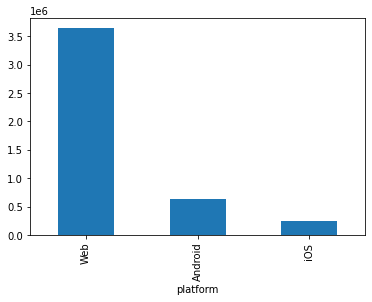

In [6]:
describe(few_attributes[0])

GP:COLLEGE TYPE
99.47% de valores não faltantes 

["Pública"]    75.829048
["Privada"]    24.170952
Name: gp:college type, dtype: float64 



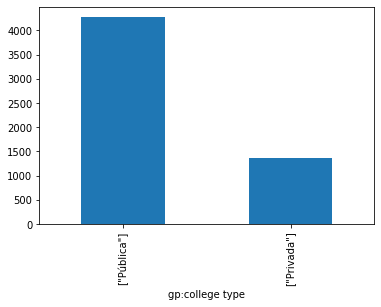

In [7]:
describe(few_attributes[1])

GP:PREVIOUS EXPERIENCE
99.47% de valores não faltantes 

beginner            57.798294
experient           28.560631
professional         9.699555
highly_experient     3.941520
Name: gp:previous experience, dtype: float64 



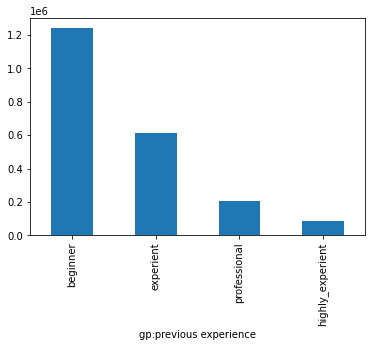

In [8]:
describe(few_attributes[2])

GP:SEGMENT
99.47% de valores não faltantes 

Concurso Público    96.213688
Concurso Militar     3.745171
OAB                  0.030264
Enem                 0.010877
Name: gp:segment, dtype: float64 



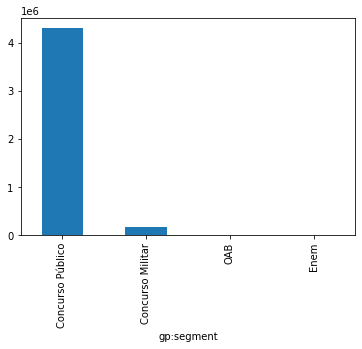

In [9]:
describe(few_attributes[3])

GP:SOURCE_PROJECT
99.47% de valores não faltantes 

odin    88.202841
ils     11.797159
Name: gp:source_project, dtype: float64 



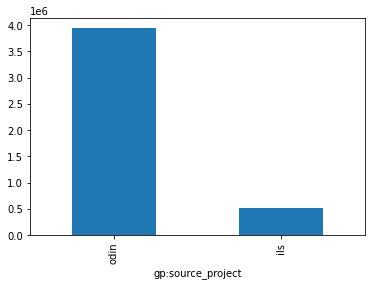

In [10]:
describe(few_attributes[4])

ACERTOU
99.47% de valores não faltantes 

1    64.744436
0    35.255564
Name: acertou, dtype: float64 



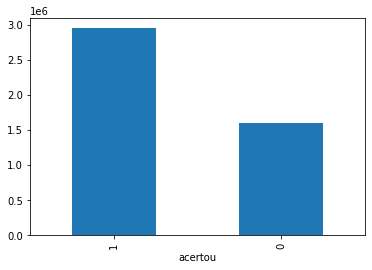

In [11]:
describe(few_attributes[5])

COMMENTED_BY_PROFESSOR
99.47% de valores não faltantes 

1.0    56.522966
0.0    43.477034
Name: commented_by_professor, dtype: float64 



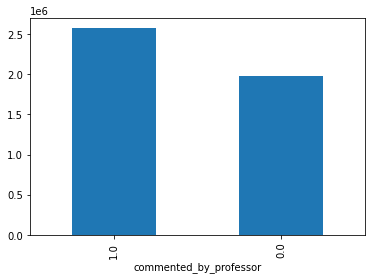

In [12]:
describe(few_attributes[6])

DIFFICULTY
99.47% de valores não faltantes 

2.0    40.806969
1.0    30.695943
3.0    24.108034
4.0     4.328932
5.0     0.060122
Name: difficulty, dtype: float64 



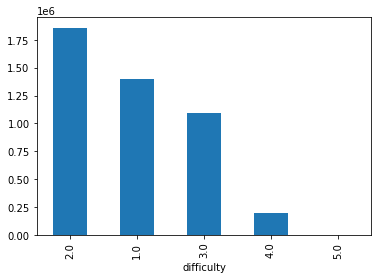

In [13]:
describe(few_attributes[7])

MODALITY_ID
99.47% de valores não faltantes 

1.0    76.887722
2.0    23.112278
Name: modality_id, dtype: float64 



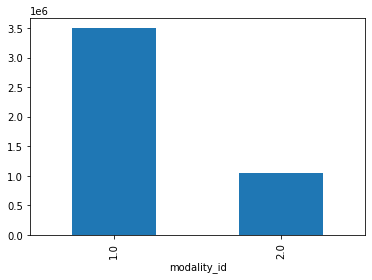

In [14]:
describe(few_attributes[8])

NULLIFIED
99.47% de valores não faltantes 

0.0    99.732165
1.0     0.267835
Name: nullified, dtype: float64 



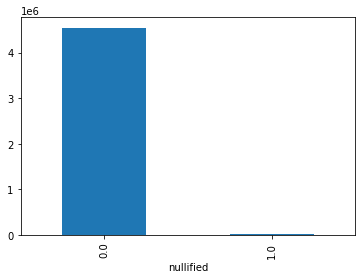

In [15]:
describe(few_attributes[9])

OUTDATED
99.47% de valores não faltantes 

0.0    98.069875
1.0     1.930125
Name: outdated, dtype: float64 



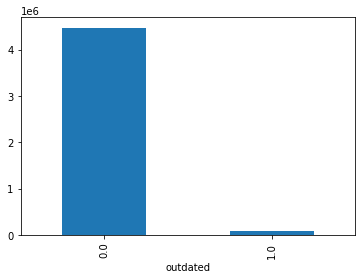

In [16]:
describe(few_attributes[10])

PRODUCT_ID
99.47% de valores não faltantes 

1.0    91.742184
5.0     5.498313
7.0     2.227981
3.0     0.318813
9.0     0.212710
Name: product_id, dtype: float64 



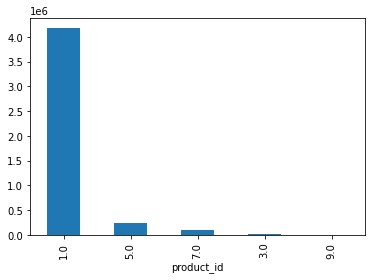

In [17]:
describe(few_attributes[11])

SCHOLARITY_ID
99.47% de valores não faltantes 

3.0    66.889647
2.0    31.029073
1.0     2.081280
Name: scholarity_id, dtype: float64 



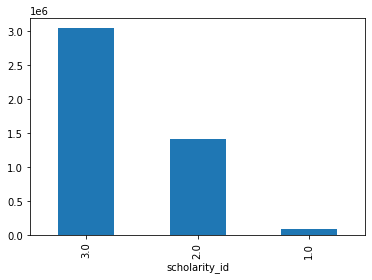

In [18]:
describe(few_attributes[12])

## **3.2. Descrição de variáveis com mais de 5 atributos**

In [19]:
many_attributes = []
for col in list(data.columns):
  if data[col].nunique() >= 5:
    many_attributes.append(col)

In [20]:
many_attributes

['novo_user_id',
 'city',
 'country',
 'device',
 'device_type',
 'os',
 'region',
 'gp:carrers',
 'gp:degree course',
 'gp:school type',
 'created_at',
 'row',
 'difficulty',
 'discipline_id',
 'examining_board_id',
 'institute_id',
 'knowledge_area_id',
 'product_id',
 'publication_year',
 'right_answer',
 'novo_question_id',
 'subject_id']

In [21]:
for col in many_attributes:
  print(f'{col.upper()} -- {data[col].nunique()} valores/atributos diferentes. \n');
  print(f'{(data[col].count()/len(data))*100:.2f}% de valores não faltantes \n')
  if data[col].nunique()>0 and data[col].nunique() <10:
    print((data[col].value_counts(1)*100));
  else:
    try:
      print((data[col].value_counts(1)*100)[:10])
    except KeyError:
      print((data[col].value_counts(1)*100))
  print('------------------------------------------------------------------- \n')

NOVO_USER_ID -- 20000 valores/atributos diferentes. 

100.00% de valores não faltantes 

5581     0.015185
11554    0.013452
10479    0.013057
18997    0.012442
11608    0.012267
19315    0.011630
9677     0.011411
8522     0.011389
18015    0.010994
4890     0.010994
Name: novo_user_id, dtype: float64
------------------------------------------------------------------- 

CITY -- 1799 valores/atributos diferentes. 

92.94% de valores não faltantes 

Brasília          8.959997
Rio de Janeiro    5.961108
São Paulo         5.788178
Fortaleza         3.731646
Manaus            2.655531
Belo Horizonte    2.360364
Salvador          2.151498
Recife            2.001329
Goiânia           1.970020
Porto Alegre      1.642553
Name: city, dtype: float64
------------------------------------------------------------------- 

COUNTRY -- 18 valores/atributos diferentes. 

99.33% de valores não faltantes 

Brazil           99.844224
United States     0.038397
Portugal          0.016636
Switzerland       0

# **4) Remoção de variáveis pouco relevantes ou pouco representativas**

In [5]:
# Estabelecendo um mínimo de 40% de valores não nulos para cada variável
min_number_columns = 0.4*len(data)

# Armazenando as colunas que tem mais do 40% de valores nulos
null_columns  = []
for col in data.columns:
  if data[col].count() <= min_number_columns:
    null_columns.append(col)

# Armazenando as colunas que tem valores ou atributos muito desbalanceadas
unbalanced_columns=[]
for col in data.columns:
  try:
    if data[col].value_counts(1)[0] > 0.9:
      unbalanced_columns.append(col)
  except KeyError:
    None

# Removendo do DataFrame as colunas com valores constantes e
# as que tem demais valores nulos.
data1 = data.drop(columns= null_columns + unbalanced_columns)

In [6]:
data1.columns

Index(['novo_user_id', 'city', 'device', 'device_type', 'os', 'platform',
       'region', 'gp:carrers', 'gp:previous experience', 'gp:source_project',
       'acertou', 'created_at', 'row', 'commented_by_professor', 'difficulty',
       'discipline_id', 'examining_board_id', 'institute_id',
       'knowledge_area_id', 'modality_id', 'product_id', 'publication_year',
       'right_answer', 'scholarity_id', 'novo_question_id', 'subject_id'],
      dtype='object')

# **5) Tratamento de variáveis**

In [7]:
data2 = data1.copy()

# Estabelecendo dicionários para agrupar atributos.

dict_source = {'odin':1, 'ils':0}
dict_platform = {'Web':2, 'Android':1, 'iOS':0}
dict_prev_experience = {'beginner':0,
                        'experient':1,
                        'highly_experient':2,
                        'professional':3 }

# Atribuindo números em atributos.
data2['gp:source_project'] = data1['gp:source_project'].map(dict_source)

def encode_5(value):
  return value - 2000

data2['publication_year'] = data1['publication_year'].apply(lambda s: encode_5(s))

# **6) Definição de variável objtivo e variáveis de entrada**

In [8]:
X = data2[['device',
           'os',
           'platform',
           'region',
           'gp:carrers',
           'gp:source_project',
           'row',
           'commented_by_professor',
           'difficulty',
           'discipline_id',
           'examining_board_id',
           'institute_id',
           'knowledge_area_id',
           'modality_id',
           'product_id',
           'publication_year',
           'right_answer',
           'scholarity_id',
           'novo_question_id']]

y= data2['acertou']

In [9]:
# Substituindo valores faltantes.

X['region'].fillna('-', inplace=True)
X['gp:carrers'].fillna('-', inplace=True)
X['right_answer'].fillna('-', inplace=True)
X['platform'].fillna('-', inplace=True)
X['device'].fillna('-', inplace=True)
X['os'].fillna('-', inplace=True)

X['gp:source_project'].fillna(-1, inplace=True)
X['commented_by_professor'].fillna(-1, inplace=True)
X['difficulty'].fillna(-1, inplace=True)
X['discipline_id'].fillna(-1, inplace=True)
X['examining_board_id'].fillna(-1, inplace=True)
X['institute_id'].fillna(-1, inplace=True)
X['knowledge_area_id'].fillna(-1, inplace=True)
X['modality_id'].fillna(-1, inplace=True)
X['product_id'].fillna(-1, inplace=True)
X['publication_year'].fillna(-1, inplace=True)
X['scholarity_id'].fillna(-1, inplace=True)
#X['subject_id'].fillna(-1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
X.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4557085 entries, 0 to 4557084
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   device                  4557085 non-null  object 
 1   os                      4557085 non-null  object 
 2   platform                4557085 non-null  object 
 3   region                  4557085 non-null  object 
 4   gp:carrers              4557085 non-null  object 
 5   gp:source_project       4557085 non-null  float64
 6   row                     4557085 non-null  int64  
 7   commented_by_professor  4557085 non-null  float64
 8   difficulty              4557085 non-null  float64
 9   discipline_id           4557085 non-null  float64
 10  examining_board_id      4557085 non-null  float64
 11  institute_id            4557085 non-null  float64
 12  knowledge_area_id       4557085 non-null  float64
 13  modality_id             4557085 non-null  float64
 14  pr

In [11]:
X.head()

,device,os,platform,region,gp:carrers,gp:source_project,row,commented_by_professor,difficulty,discipline_id,examining_board_id,institute_id,knowledge_area_id,modality_id,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,Apple iPhone,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",0.0,1,0.0,4.0,238.0,73.0,4126.0,13.0,1.0,1.0,22.0,A,2.0,489400
1,Apple iPhone,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",0.0,2,0.0,4.0,238.0,73.0,4126.0,13.0,1.0,1.0,22.0,C,2.0,489399
2,Apple iPhone,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",0.0,3,0.0,3.0,238.0,73.0,4126.0,13.0,1.0,1.0,22.0,D,2.0,489398
3,Apple iPhone,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",0.0,4,0.0,4.0,238.0,73.0,4126.0,13.0,1.0,1.0,22.0,A,2.0,489397
4,Apple iPhone,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",0.0,5,0.0,3.0,238.0,73.0,4126.0,13.0,1.0,1.0,22.0,E,2.0,489396


In [12]:
# Separando em conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3417813, 19), (1139272, 19), (3417813,), (1139272,))

# **7) Pre-processamento de dados**

In [13]:
X_train.head()


,device,os,platform,region,gp:carrers,gp:source_project,row,commented_by_professor,difficulty,discipline_id,examining_board_id,institute_id,knowledge_area_id,modality_id,product_id,publication_year,right_answer,scholarity_id,novo_question_id
3320049,Samsung Galaxy Phone,Chrome 104,Web,Rio Grande do Sul,Policial,1.0,62,1.0,3.0,560.0,246.0,112.0,9.0,1.0,1.0,16.0,D,3.0,218670
4348413,Samsung Phone,Chrome 103,Web,Santa Catarina,Administrativa,1.0,99,1.0,2.0,19.0,2.0,6206.0,9.0,2.0,1.0,14.0,E,3.0,121830
3556607,Windows,Chrome 102,Web,Tocantins,"Tribunal, Administrativa, Policial, Outras",1.0,76,1.0,2.0,1.0,2.0,9821.0,14.0,2.0,1.0,21.0,C,2.0,437991
467512,Windows,Chrome 103,Web,Pernambuco,Educação,1.0,80,1.0,3.0,1.0,63.0,6672.0,14.0,1.0,1.0,22.0,A,3.0,493867
2152684,Apple iPhone,Mobile Safari 15,Web,Rio de Janeiro,Tribunal,1.0,79,1.0,2.0,46.0,1326.0,4505.0,13.0,1.0,1.0,20.0,D,2.0,347168


In [14]:
# Aplicando preporcessador LabelEncoder nas variáveis não numéricas.
le = preprocessing.LabelEncoder()
X_train['platform'] = le.fit_transform(X_train['platform'])
X_train['region'] = le.fit_transform(X_train['region'])
X_train['gp:carrers'] = le.fit_transform(X_train['gp:carrers'])
X_train['right_answer'] = le.fit_transform(X_train['right_answer'])
X_train['device'] = le.fit_transform(X_train['device'])
X_train['os'] = le.fit_transform(X_train['os'])

X_test['platform'] = le.fit_transform(X_test['platform'])
X_test['region'] = le.fit_transform(X_test['region'])
X_test['gp:carrers'] = le.fit_transform(X_test['gp:carrers'])
X_test['right_answer'] = le.fit_transform(X_test['right_answer'])
X_test['device'] = le.fit_transform(X_test['device'])
X_test['os'] = le.fit_transform(X_test['os'])

In [15]:
X_train.isna().sum()

device                    0
os                        0
platform                  0
region                    0
gp:carrers                0
gp:source_project         0
row                       0
commented_by_professor    0
difficulty                0
discipline_id             0
examining_board_id        0
institute_id              0
knowledge_area_id         0
modality_id               0
product_id                0
publication_year          0
right_answer              0
scholarity_id             0
novo_question_id          0
dtype: int64

# **8) Escolha e definição dos modelos**

In [20]:
# Definindo o modelo a ser utilizado: Floresta Aleatória.
model_1 = DecisionTreeClassifier()
model_2 = RandomForestClassifier(n_estimators=30, random_state=42)

In [21]:
# Aplicando o modelo 1 e calculando o f1.
model_1.fit(X_train, y_train)
y_pred1 = model_1.predict(X_test)

In [17]:
# Aplicando o modelo 2 e calculando o f1.
model_2.fit(X_train, y_train)
y_pred2 = model_2.predict(X_test)

In [22]:
# Avaliando graus de exatitude dos modelos com f1-score.
print(f'f1-score do modelo 1: {f1_score(y_test, y_pred1)}')
print(f'f1-score do modelo 2: {f1_score(y_test, y_pred2)}')

f1-score do modelo 1: 0.8947563467481734
f1-score do modelo 2: 0.9187431735629557


# **9) Aplicação do modelo e elaboração da predição**

In [23]:
# Aplicando tratamento de variáveis.
df_submit['gp:source_project'] = df_submit['gp:source_project'].map(dict_source)
df_submit['publication_year'] = df_submit['publication_year'].apply(lambda s: encode_5(s))


In [24]:
X_aplic = df_submit[['device',
           'os',
           'platform',
           'region',
           'gp:carrers',
           'gp:source_project',
           'row',
           'commented_by_professor',
           'difficulty',
           'discipline_id',
           'examining_board_id',
           'institute_id',
           'knowledge_area_id',
           'modality_id',
           'product_id',
           'publication_year',
           'right_answer',
           'scholarity_id',
           'novo_question_id']]

In [ ]:
# Substituindo valores faltantes.

X_aplic['region'].fillna('-', inplace=True)
X_aplic['gp:carrers'].fillna('-', inplace=True)
X_aplic['right_answer'].fillna('-', inplace=True)
X_aplic['device'].fillna('-', inplace=True)
X_aplic['os'].fillna('-', inplace=True)
X_aplic['platform'].fillna('-', inplace=True)

X_aplic['gp:source_project'].fillna(-1, inplace=True)
X_aplic['commented_by_professor'].fillna(-1, inplace=True)
X_aplic['difficulty'].fillna(-1, inplace=True)
X_aplic['discipline_id'].fillna(-1, inplace=True)
X_aplic['examining_board_id'].fillna(-1, inplace=True)
X_aplic['institute_id'].fillna(-1, inplace=True)
X_aplic['knowledge_area_id'].fillna(-1, inplace=True)
X_aplic['modality_id'].fillna(-1, inplace=True)
X_aplic['product_id'].fillna(-1, inplace=True)
X_aplic['publication_year'].fillna(-1, inplace=True)
X_aplic['scholarity_id'].fillna(-1, inplace=True)

In [ ]:
# Aplicando LabelEncoder no conjunto de aplicação.

X_aplic['region'] = le.fit_transform(X_aplic['region'])
X_aplic['gp:carrers'] = le.fit_transform(X_aplic['gp:carrers'])
X_aplic['right_answer'] = le.fit_transform(X_aplic['right_answer'])
X_aplic['platform'] = le.fit_transform(X_aplic['platform'])
X_aplic['device'] = le.fit_transform(X_aplic['device'])
X_aplic['os'] = le.fit_transform(X_aplic['os'])


In [27]:
X_aplic.head()

,device,os,platform,region,gp:carrers,gp:source_project,row,commented_by_professor,difficulty,discipline_id,examining_board_id,institute_id,knowledge_area_id,modality_id,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,48,228,3,40,1148,0.0,101,0.0,2.0,95.0,63.0,6289.0,13.0,1.0,1.0,21.0,2,3.0,484766
1,200,6,2,44,1147,1.0,101,0.0,1.0,56.0,570.0,2994.0,53.0,1.0,1.0,16.0,3,3.0,159545
2,48,229,3,28,233,0.0,101,0.0,4.0,16.0,5.0,20.0,14.0,1.0,1.0,17.0,3,3.0,233145
3,200,6,2,35,679,1.0,101,1.0,1.0,3.0,2.0,36.0,9.0,2.0,1.0,14.0,3,3.0,108082
4,200,52,2,14,143,1.0,101,0.0,3.0,99.0,1.0,6001.0,13.0,1.0,1.0,15.0,1,3.0,151695


In [ ]:
# Utilizando o modelo 2 para predizer, pois foi o que teve o melhor f1.

y_final_pred = model_2.predict(X_aplic)

In [ ]:
# Criando DataFrame com predições.
df_predict = pd.DataFrame(y_final_pred)
df_predict = df_predict.rename(columns={0:'prediction'})

# Salvando em arquivo csv para exportar.
df_predict.to_csv('prediction.csv', index=False)